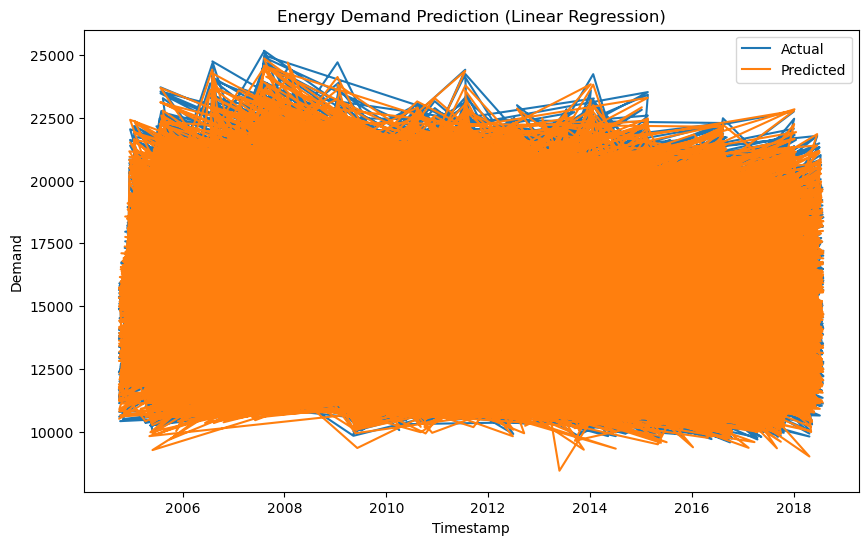

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error

# Load the dataset
# Replace 'energy_data.csv' with the actual filename/path
data = pd.read_csv('AEP_hourly.csv')

# Preprocess the data (assuming 'timestamp' and 'demand' columns)
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)
# Create lag features (e.g., demand at previous time steps)
for i in range(1, 6):
    data[f'AEP_MW_lag_{i}'] = data['AEP_MW'].shift(i)
# Drop rows with NaN values due to lag creation
data.dropna(inplace=True)

# Split the data into features and target variable
X = data.drop('AEP_MW', axis=1)
y = data['AEP_MW']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Demand')
plt.title('Energy Demand Prediction (Linear Regression)')
plt.legend()
plt.show()

In [3]:
X

,AEP_MW_lag_1,AEP_MW_lag_2,AEP_MW_lag_3,AEP_MW_lag_4,AEP_MW_lag_5
Datetime,,,,,
2004-12-31 06:00:00,12670.0,12517.0,12577.0,12865.0,13478.0
2004-12-31 07:00:00,13038.0,12670.0,12517.0,12577.0,12865.0
2004-12-31 08:00:00,13692.0,13038.0,12670.0,12517.0,12577.0
2004-12-31 09:00:00,14297.0,13692.0,13038.0,12670.0,12517.0
2004-12-31 10:00:00,14719.0,14297.0,13692.0,13038.0,12670.0
...,...,...,...,...,...
2018-01-01 20:00:00,20925.0,20279.0,19109.0,18691.0,18619.0
2018-01-01 21:00:00,21089.0,20925.0,20279.0,19109.0,18691.0
2018-01-01 22:00:00,20999.0,21089.0,20925.0,20279.0,19109.0


In [4]:
y

Datetime
2004-12-31 06:00:00    13038.0
2004-12-31 07:00:00    13692.0
2004-12-31 08:00:00    14297.0
2004-12-31 09:00:00    14719.0
2004-12-31 10:00:00    14941.0
                        ...   
2018-01-01 20:00:00    21089.0
2018-01-01 21:00:00    20999.0
2018-01-01 22:00:00    20820.0
2018-01-01 23:00:00    20415.0
2018-01-02 00:00:00    19993.0
Name: AEP_MW, Length: 121268, dtype: float64